In [33]:
#capstone project

In [34]:
# import libreary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#load data
data =pd.read_csv(r'Tesla Dataset.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3504,2024-05-31,178.500000,180.320007,173.820007,178.080002,178.080002,67314600
3505,2024-06-03,178.130005,182.639999,174.490005,176.289993,176.289993,68568900
3506,2024-06-04,174.779999,177.759995,174.000000,174.770004,174.770004,60056300
3507,2024-06-05,175.350006,176.149994,172.130005,175.000000,175.000000,57614800


In [36]:
# *****volatility******
# extract closing prices
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
closing_prices = data['Close']

In [37]:
#calculate daily returns
returns = closing_prices.pct_change()
returns = returns.dropna() 

In [38]:
# calculate daily volatility
daily_volatility = returns.std()
# calculate annual volatility
annual_volatility = daily_volatility * (252**0.5)
print(f"Annualized Volatility: {annual_volatility:.4f}")


Annualized Volatility: 0.5683


In [39]:
#    *****historical price patterns******
# Calculate Simple Moving Average and  Exponential Moving Average value 50 and 200 days
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] =data['Close'].rolling(window=200).mean()
data['EMA50'] =data['Close'].ewm(span=50, adjust=False).mean()
data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()
print(data[['Close', 'SMA50', 'SMA200', 'EMA50', 'EMA200']].tail())


                 Close     SMA50     SMA200       EMA50      EMA200
Date                                                               
2024-05-31  178.080002  171.9572  212.09570  176.647378  199.675221
2024-06-03  176.289993  172.0266  211.84915  176.633363  199.442532
2024-06-04  174.770004  172.1054  211.62690  176.560290  199.197035
2024-06-05  175.000000  172.1528  211.42445  176.499102  198.956268
2024-06-06  175.440002  172.1082  211.14525  176.457569  198.722275


In [40]:
#  Maximum High price
Maximum_high_level=data['High'].max()

#  Minimum Low price
Minimum_low_price = data['Low'].min()

print(f"Support level: {Maximum_high_level}")
print(f"Resistance level: {Minimum_low_price}")


Support level: 414.496674
Resistance level: 0.998667


In [41]:
# Displaying Golden and Death Cross points
data['Golden_Cross'] = data['SMA50'] > data['SMA200']
data['Death_Cross'] = data['SMA50'] < data['SMA200']
print(data[[ 'Golden_Cross', 'Death_Cross']].tail())


            Golden_Cross  Death_Cross
Date                                 
2024-05-31         False         True
2024-06-03         False         True
2024-06-04         False         True
2024-06-05         False         True
2024-06-06         False         True


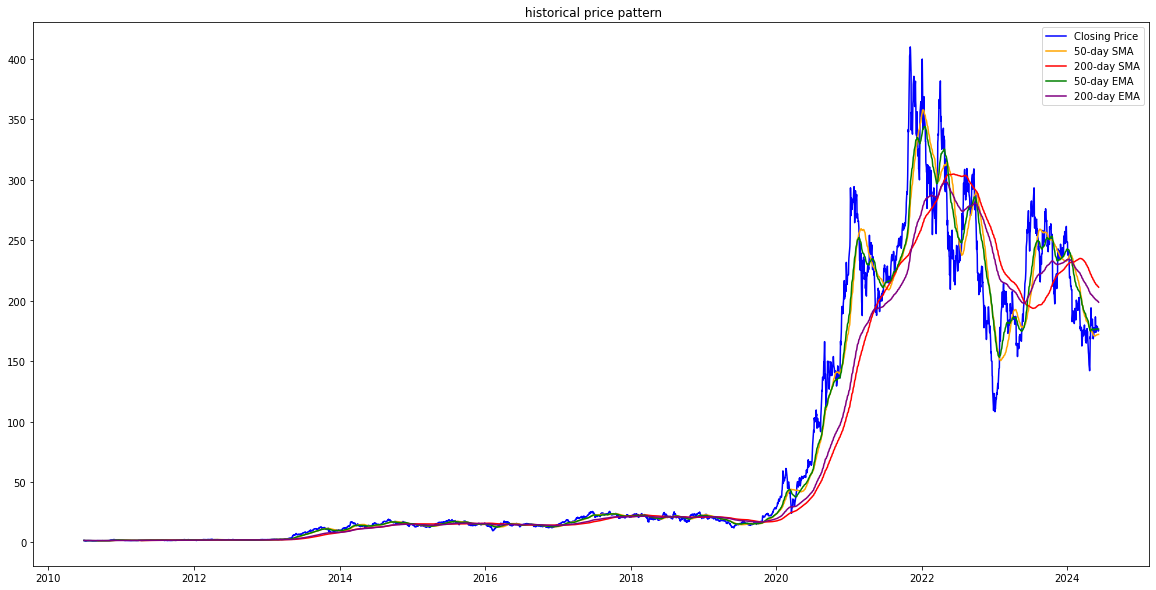

In [42]:
# Step 5: Plotting the Result
plt.figure(figsize=(20,10))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['SMA50'], label='50-day SMA', color='orange')
plt.plot(data['SMA200'], label='200-day SMA', color='red')
plt.plot(data['EMA50'], label='50-day EMA', color='green')
plt.plot(data['EMA200'], label='200-day EMA', color='purple')
plt.title(' historical price pattern')
plt.legend()
plt.show()

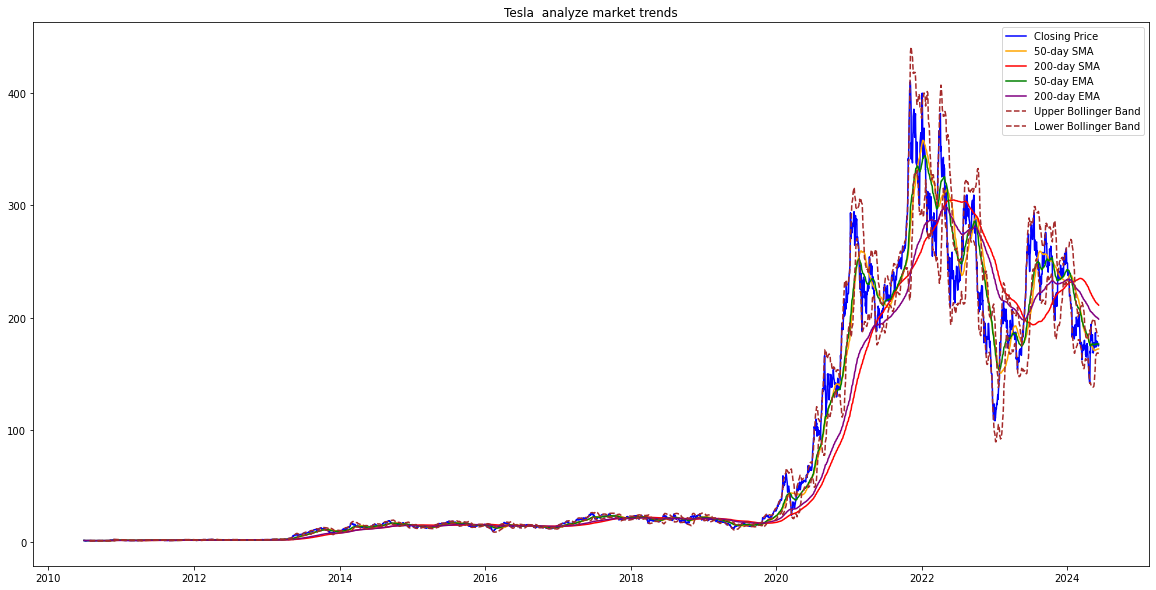

In [43]:
#  Calculate Bollinger Bands
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['stddev'] = data['Close'].rolling(window=20).std()
data['Upper_Band'] = data['SMA20'] + (data['stddev'] * 2)
data['Lower_Band'] = data['SMA20'] - (data['stddev'] * 2)
#  Plotting the Results
plt.figure(figsize=(20, 10))
plt.plot(data['Close'], label='Closing Price', color='blue')
plt.plot(data['SMA50'], label='50-day SMA', color='orange')
plt.plot(data['SMA200'], label='200-day SMA', color='red')
plt.plot(data['EMA50'], label='50-day EMA', color='green')
plt.plot(data['EMA200'], label='200-day EMA', color='purple')
plt.plot(data['Upper_Band'], label='Upper Bollinger Band', color='brown', linestyle='--')
plt.plot(data['Lower_Band'], label='Lower Bollinger Band', color='brown', linestyle='--')
plt.title('Tesla  analyze market trends')
plt.legend()
plt.show()


In [44]:
df=pd.DataFrame(data)

In [45]:
duplicates=df.duplicated()
duplicates

Date
2010-06-29    False
2010-06-30    False
2010-07-01    False
2010-07-02    False
2010-07-06    False
              ...  
2024-05-31    False
2024-06-03    False
2024-06-04    False
2024-06-05    False
2024-06-06    False
Length: 3509, dtype: bool

In [46]:
columns = ['Close', 'SMA50', 'SMA200', 'EMA50', 'EMA200', 'Upper_Band', 'Lower_Band']
correlation_matrix = data[columns].corr()



In [47]:
data['Year'] = data.index.year

In [51]:
#analyze market trends
columns = ['Close', 'SMA50', 'SMA200', 'EMA50', 'EMA200', 'Upper_Band', 'Lower_Band']
correlation_by_year = pd.DataFrame()
for year in data['Year'].unique():
    year_data = data[data['Year'] == year]
    correlation_matrix = year_data[columns].corr()
    correlation_by_year[year] = correlation_matrix['Close']  
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_by_year.T, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Tesla analyze market trends')
plt.xlabel('Indicators')
plt.ylabel('Year')
plt.show()

NameError: name 'sns' is not defined

<Figure size 1440x720 with 0 Axes>

In [52]:
#historical price pattern
data = data[['Close']]
data['Year'] = data.index.year
price_bins = np.arange(data['Close'].min(), data['Close'].max(), step=10)  
data['Price_Bin'] = pd.cut(data['Close'], bins=price_bins, labels=price_bins[:-1])
heatmap_data = pd.crosstab(data['Year'], data['Price_Bin'])
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5)
plt.title('Tesla Historical Price Pattern (Year vs Price Range)')
plt.xlabel('Price Range')
plt.ylabel('Year')
plt.show()

C:\Users\Hi\AppData\Local\Temp/ipykernel_5824/2919363196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data.index.year
C:\Users\Hi\AppData\Local\Temp/ipykernel_5824/2919363196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_Bin'] = pd.cut(data['Close'], bins=price_bins, labels=price_bins[:-1])


NameError: name 'sns' is not defined

<Figure size 1008x576 with 0 Axes>

C:\Users\Hi\AppData\Local\Temp/ipykernel_5824/1801050209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
C:\Users\Hi\AppData\Local\Temp/ipykernel_5824/1801050209.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean()
C:\Users\Hi\AppData\Local\Temp/ipykernel_5824/1801050209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of

ValueError: s must be a scalar, or float array-like with the same size as x and y

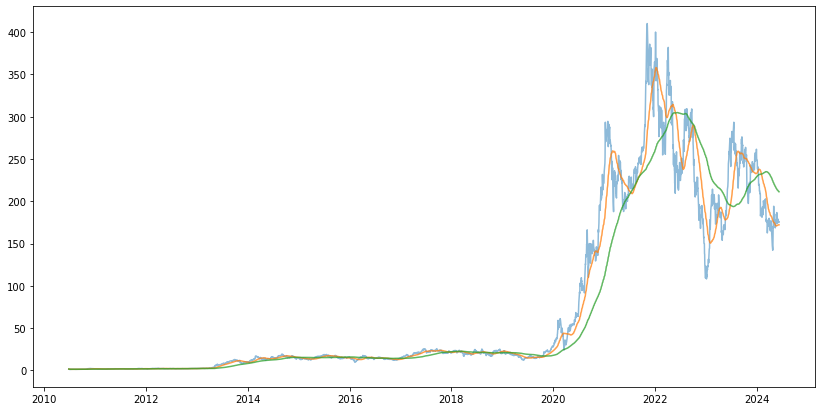

In [53]:
#moving avrage analysis
short_window = 50
long_window = 200
data['Short_MA'] = data['Close'].rolling(window=short_window, min_periods=1).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window, min_periods=1).mean() 
data['Signal'] = 0
data['Signal'][short_window:] = np.where(data['Short_MA'][short_window:] >data['Long_MA'][short_window:], 1, 0)
data['Position'] = data['Signal'].diff()
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Tesla Close Price', alpha=0.5)
plt.plot(data['Short_MA'], label='50-Day Moving Average', alpha=0.75)
plt.plot(data['Long_MA'], label='200-Day Moving Average', alpha=0.75)
plt.scatter(data[data['Position'] == 1].index,
           data['Short_MA'][data['Position'] == 1],
         '^', markersize=10, color='g', lw=0, label='Buy Signal')
plt.scatter(data[data['Position'] == -1].index,
          data['Short_MA'][data['Position'] == -1],
         'v', markersize=10, color='r', lw=0, label='Sell Signal')
plt.title('Tesla Moving Average Crossover Analysis')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()